In [73]:
%pip install tensorflow
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install pydot

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\lance\appdata\local\programs\python\python310\lib\site-packages (2.14.0)




[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
from pathlib import Path
import imghdr
import os

data_dir = "hair_types"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (64, 64)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size, 
    labels='inferred',
    label_mode='categorical'
)

Found 981 files belonging to 3 classes.
Using 785 files for training.
Found 981 files belonging to 3 classes.
Using 196 files for validation.


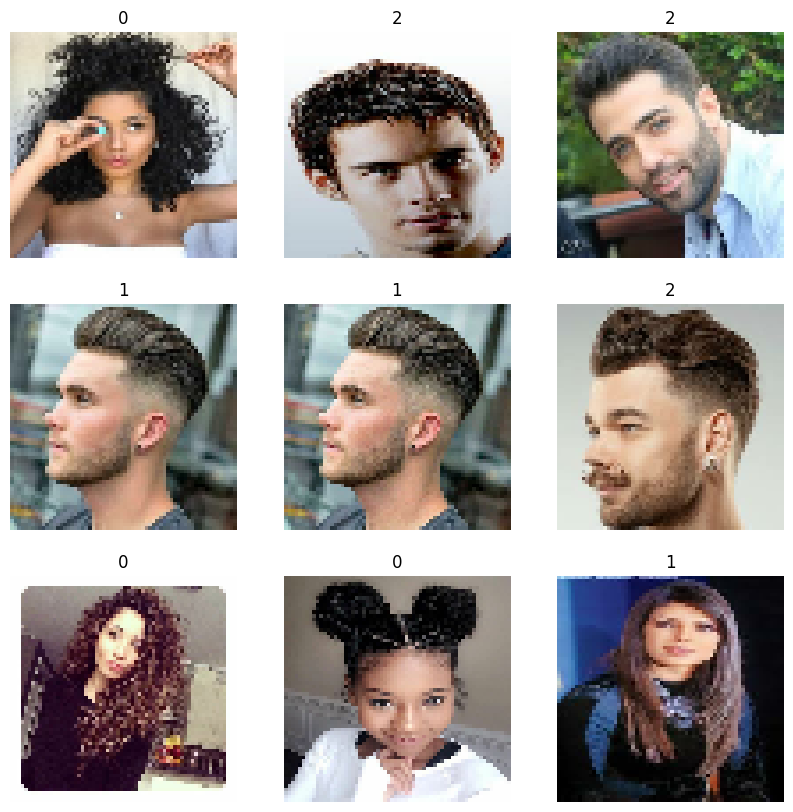

In [76]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(keras.Input(shape=image_size + (3,))) # 64, 64, 3
model.add(layers.Rescaling(1.0 / 255))
model.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))
model.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))
model.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
model.add(layers.Activation("relu"))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dense(3))
model.add(layers.Activation("softmax"))


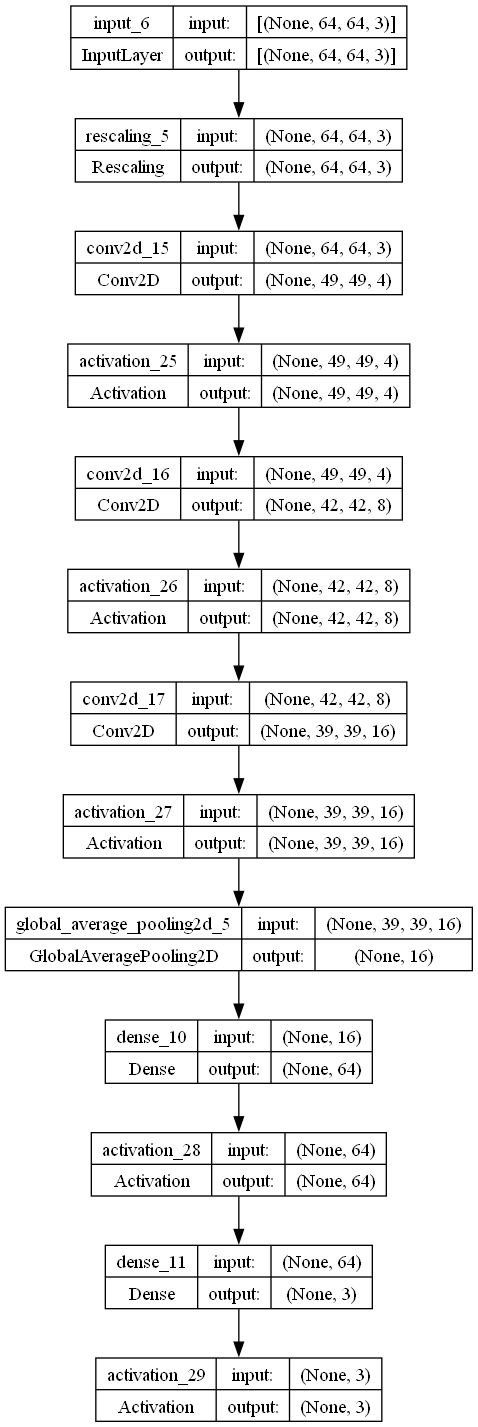

In [78]:
tf.keras.utils.plot_model(model, to_file='model_test.png', show_shapes=True)

In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 49, 49, 4)         3076      
                                                                 
 activation_25 (Activation)  (None, 49, 49, 4)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 42, 42, 8)         2056      
                                                                 
 activation_26 (Activation)  (None, 42, 42, 8)         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 39, 39, 16)        2064      
                                                                 
 activation_27 (Activation)  (None, 39, 39, 16)       

In [80]:
epochs = 50

model.compile(
optimizer=keras.optimizers.Adam(1e-3),
loss="categorical_crossentropy",
metrics=["accuracy"],
)

model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/50
25/25 [==============================] - 5s 157ms/step - loss: 1.0976 - accuracy: 0.3401 - val_loss: 1.0979 - val_accuracy: 0.2857
Epoch 2/50
25/25 [==============================] - 4s 145ms/step - loss: 1.0781 - accuracy: 0.3605 - val_loss: 1.0830 - val_accuracy: 0.4490
Epoch 3/50
25/25 [==============================] - 4s 140ms/step - loss: 1.0644 - accuracy: 0.4637 - val_loss: 1.0668 - val_accuracy: 0.4694
Epoch 4/50
25/25 [==============================] - 4s 132ms/step - loss: 1.0399 - accuracy: 0.4777 - val_loss: 1.0525 - val_accuracy: 0.4388
Epoch 5/50
25/25 [==============================] - 4s 132ms/step - loss: 1.0297 - accuracy: 0.4764 - val_loss: 1.0341 - val_accuracy: 0.4337
Epoch 6/50
25/25 [==============================] - 4s 139ms/step - loss: 1.0109 - accuracy: 0.4752 - val_loss: 1.0203 - val_accuracy: 0.4643
Epoch 7/50
25/25 [==============================] - 4s 144ms/step - loss: 1.0325 - accuracy: 0.4662 - val_loss: 1.0442 - val_accuracy: 0.4031
Epoch 

In [81]:
img = keras.preprocessing.image.load_img(
    "hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create batch axis
predictions = model.predict(img_array)
print(
    "This image is %.2f percent curly hair, %.2f percent straight hair, and %.2f percent wavyhair."
% tuple(predictions[0])
)



1/1 [==============================] - 0s 87ms/step
This image is 0.62 percent curly hair, 0.25 percent straight hair, and 0.13 percent wavyhair.
